In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightkurve as lk
from lightkurve import search_targetpixelfile
from glob import glob
from astropy.io import fits
%matplotlib notebook

## A visual examination of the first 100 targets in Jim's initial maybe-long-period-EB list
See https://github.com/jradavenport/helloTESS for more details

In [3]:
jimLongPeriodFile = '/Users/Meredith/Astronomy/github/helloTESS/outputs/longerP_rot_out.csv'

In [4]:
longPeriod = pd.read_csv(jimLongPeriodFile)

In [5]:
longPeriod.set_index('Unnamed: 0', inplace=True)

In [95]:
TicEclipsing = longPeriod.loc[longPeriod['ecl_flg'] == 1, 'TIC']

In [7]:
len(list(TicEclipsing))

1847

In [8]:
result = lk.search_targetpixelfile(list(TicEclipsing)[3])
test0 = result[2].download()  # sector 3
test1 = result[3].download() # sector 4

In [10]:
test1.interact()

In [11]:
lc0 = test0.to_lightcurve()
lc1 = test1.to_lightcurve()

## Lots of work went into making this plotter!

<IPython.core.display.Javascript object>


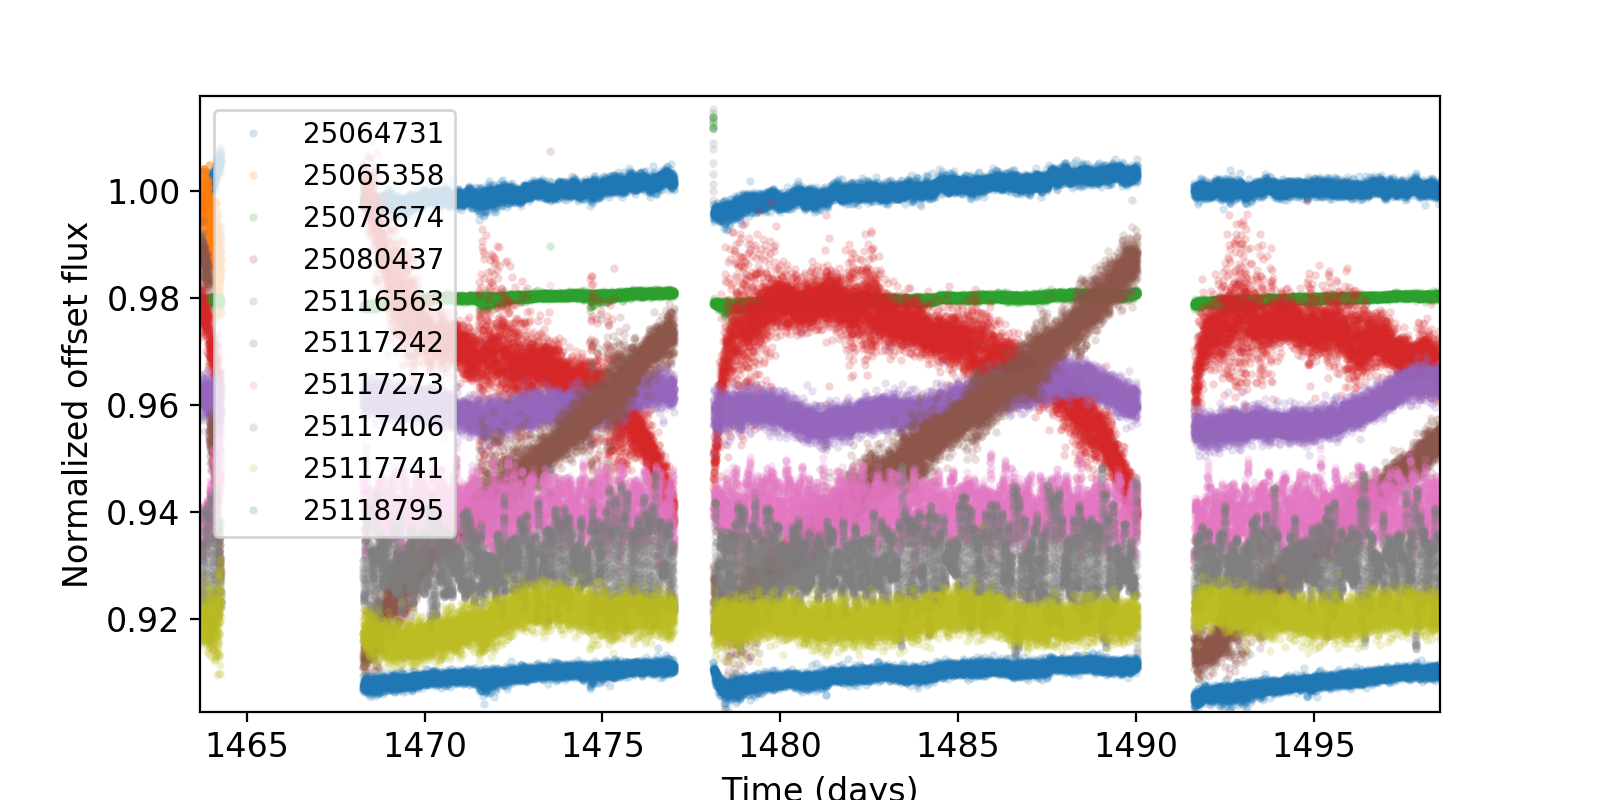

(0.8, 1.1)

In [180]:
plt.figure(figsize=(8,4))
downloadDir = '/Users/Meredith/.lightkurve-cache/mastDownload/TESS/'
offset = 0  # for plotting clarity
for idx, starId in enumerate(list(TicEclipsing)[0:10]):
    tpf = None
    lc = None
    for sector in np.arange(1, 8):
        filePath = glob(downloadDir + 'tess*s000' + str(sector) + '*' + str(starId) + '*/*.fits')
        if len(filePath) > 0:  # the file is on disk
            filePath.append(filePath[0])
            tpf = lk.TessTargetPixelFile(filePath[0])
        else:  # the file isn't on disk
            if list(search_targetpixelfile(starId, sector=sector)):  # nonzero search results
                print('Downloading sector {0} for star {1}'.format(sector, starId))
                tpf = search_targetpixelfile(starId, sector=sector).download()
        if tpf and not lc:
            lc = tpf.to_lightcurve().normalize()
        elif tpf and lc:
            newlc = tpf.to_lightcurve().normalize()
            lc = lc.append(newlc)
        else:
            pass  # there is no tpf for this target + sector
    if lc:
        coloridx = ["%.1d" % i for i in range(0, 9)]*5
        color = 'C' + str(coloridx[idx])
        #print('color is', color)
        plt.plot(lc.time, lc.flux + offset, label=starId, color=color, marker='.', ls='None', alpha=0.2, mec='None')
        offset = offset - 0.01
    else:
        print(starId, 'No LC found for any sector')
plt.xlabel('Time (days)')
plt.ylabel('Normalized offset flux')
plt.legend()
plt.gca().set_ylim(0.9 + offset, 1.1)

In [86]:
TicEclipsing[TicEclipsing == 25080437].index[0]

23

### One star had such extreme activity that it messed up the auto axis scaling
I played around with creating a bad star list so those stars could be dropped from the dataframe, but decided it was easier to just manually set the axis limits

In [96]:
badStarList = [25133286]

In [97]:
for badStar in badStarList:
    TicEclipsing.drop(labels=[TicEclipsing[TicEclipsing == badStar].index[0]], inplace=True)

In [98]:
len(TicEclipsing)

1846

## In which we learn plotting 20 stars at once is too many to look at

<IPython.core.display.Javascript object>


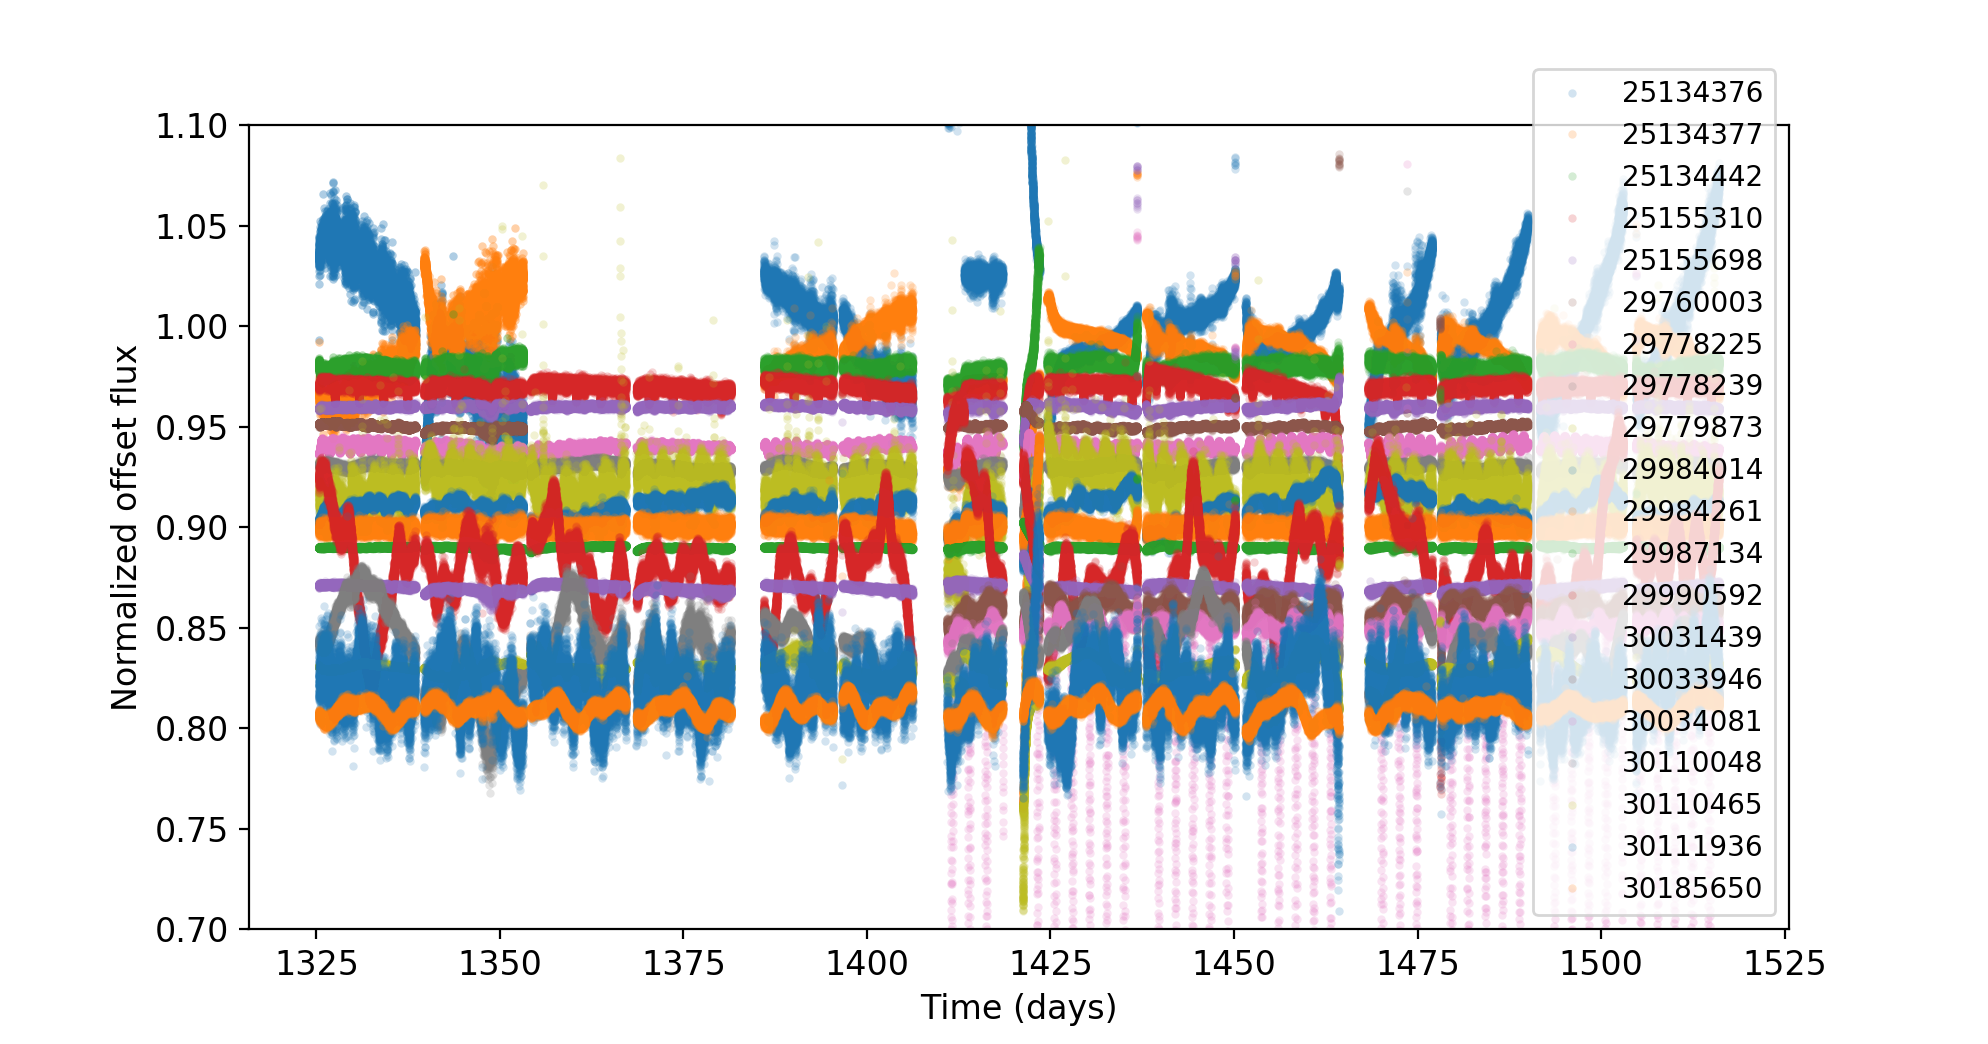

(0.7, 1.1)

In [178]:
plt.figure(figsize=(8,4))
downloadDir = '/Users/Meredith/.lightkurve-cache/mastDownload/TESS/'
offset = 0  # for plotting clarity
for idx, starId in enumerate(list(TicEclipsing)[10:30]):
    tpf = None
    lc = None
    for sector in np.arange(1, 8):
        filePath = glob(downloadDir + 'tess*s000' + str(sector) + '*' + str(starId) + '*/*.fits')
        if len(filePath) > 0:  # the file is on disk
            filePath.append(filePath[0])
            tpf = lk.TessTargetPixelFile(filePath[0])
        else:  # the file isn't on disk
            if list(search_targetpixelfile(starId, sector=sector)):  # nonzero search results
                print('Downloading sector {0} for star {1}'.format(sector, starId))
                tpf = search_targetpixelfile(starId, sector=sector).download()
        if tpf and not lc:
            lc = tpf.to_lightcurve().normalize()
        elif tpf and lc:
            newlc = tpf.to_lightcurve().normalize()
            lc = lc.append(newlc)
        else:
            pass  # there is no tpf for this target + sector
    if lc:
        coloridx = ["%.1d" % i for i in range(0, 9)]*5
        color = 'C' + str(coloridx[idx])
        #print('color is', color)
        plt.plot(lc.time, lc.flux + offset, label=starId, color=color, marker='.', ls='None', alpha=0.2, mec='None')
        offset = offset - 0.01
    else:
        print(starId, 'No LC found for any sector')
plt.xlabel('Time (days)')
plt.ylabel('Normalized offset flux')
plt.legend()
plt.gca().set_ylim(0.9 + offset, 1.1)

### I like the looks of 30034081 - serious eclipses happening

### 25155310 also has eclipses, much shallower, more exoplanet-y

In [191]:
# Making it a function !!!
# initial ticList was list(TicEclipsing)[0:10]

def plotTessLightcurves(ticList, downloadDir = '/Users/Meredith/.lightkurve-cache/mastDownload/TESS/',
                        sectorList = [1, 2, 3, 4, 5, 6, 7]):
    plt.figure(figsize=(8,4))
    offset = 0  # for plotting clarity
    for idx, starId in enumerate(ticList):
        tpf = None
        lc = None
        for sector in sectorList:
            filePath = glob(downloadDir + 'tess*s000' + str(sector) + '*' + str(starId) + '*/*.fits')
            if len(filePath) > 0:  # the file is on disk
                filePath.append(filePath[0])
                tpf = lk.TessTargetPixelFile(filePath[0])
            else:  # the file isn't on disk
                if list(search_targetpixelfile(starId, sector=sector)):  # nonzero search results
                    print('Downloading sector {0} for star {1}'.format(sector, starId))
                    tpf = search_targetpixelfile(starId, sector=sector).download()
            if tpf and not lc:
                lc = tpf.to_lightcurve().normalize()
            elif tpf and lc:
                newlc = tpf.to_lightcurve().normalize()
                lc = lc.append(newlc)
            else:
                pass  # there is no tpf for this target + sector
        if lc:
            coloridx = ["%.1d" % i for i in range(0, 9)]*5
            color = 'C' + str(coloridx[idx])
            #print('color is', color)
            plt.plot(lc.time, lc.flux + offset, label=starId, color=color, marker='.', ls='None', alpha=0.2, mec='None')
            offset = offset - 0.01
        else:
            print(starId, 'No LC found for any sector')
    plt.xlabel('Time (days)')
    plt.ylabel('Normalized offset flux')
    plt.legend()
    plt.gca().set_ylim(0.9 + offset, 1.1)

In [181]:
TicInteresting = [30034081, 25155310, ]

## Now we have a function and can just plot light curves 10 at a time foreverrrrr

<IPython.core.display.Javascript object>


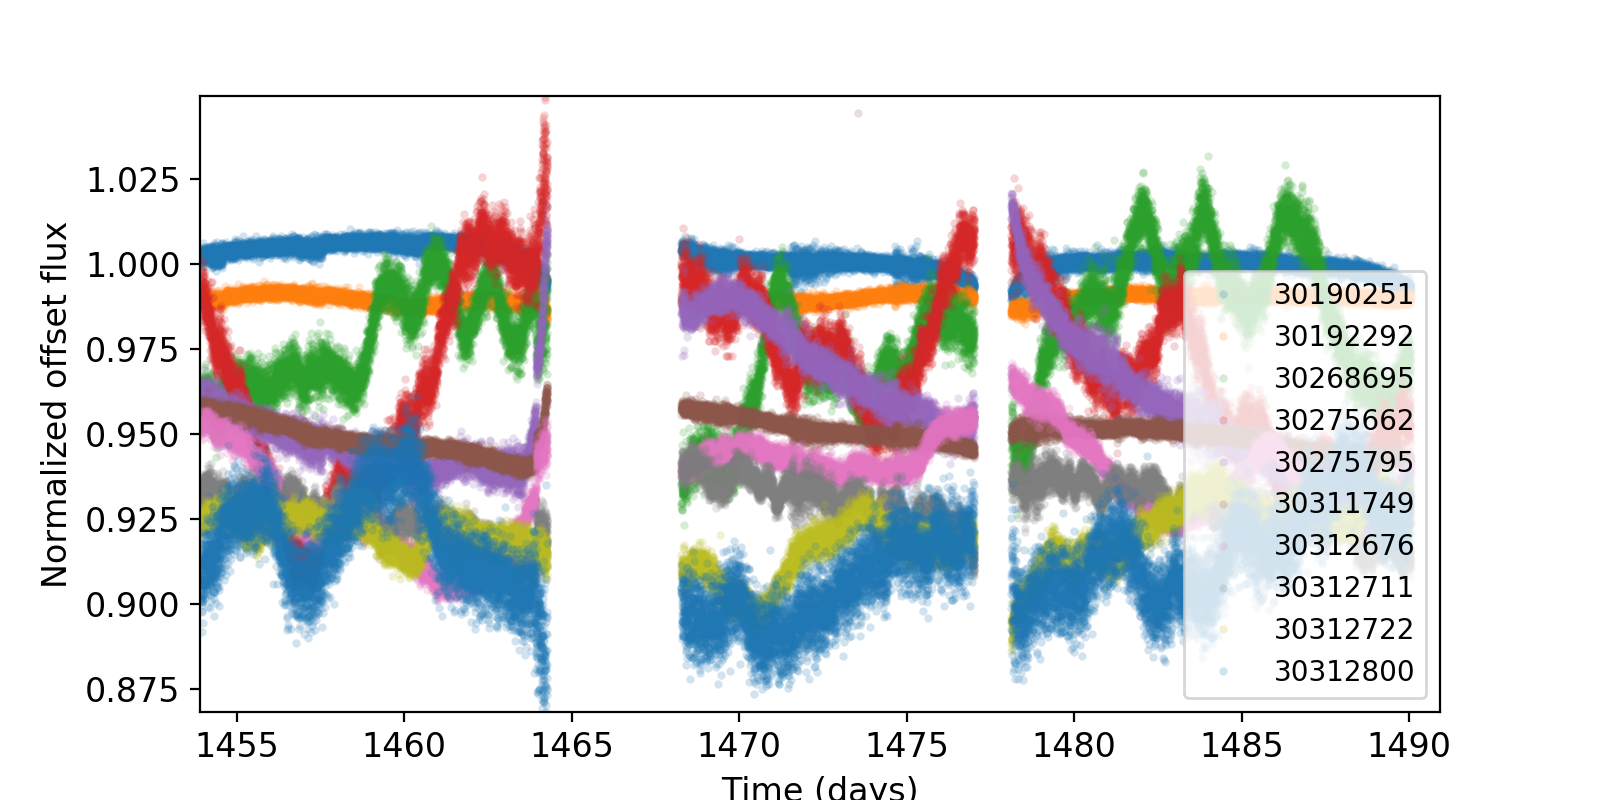

In [193]:
plotTessLightcurves(list(TicEclipsing)[30:40])

<IPython.core.display.Javascript object>


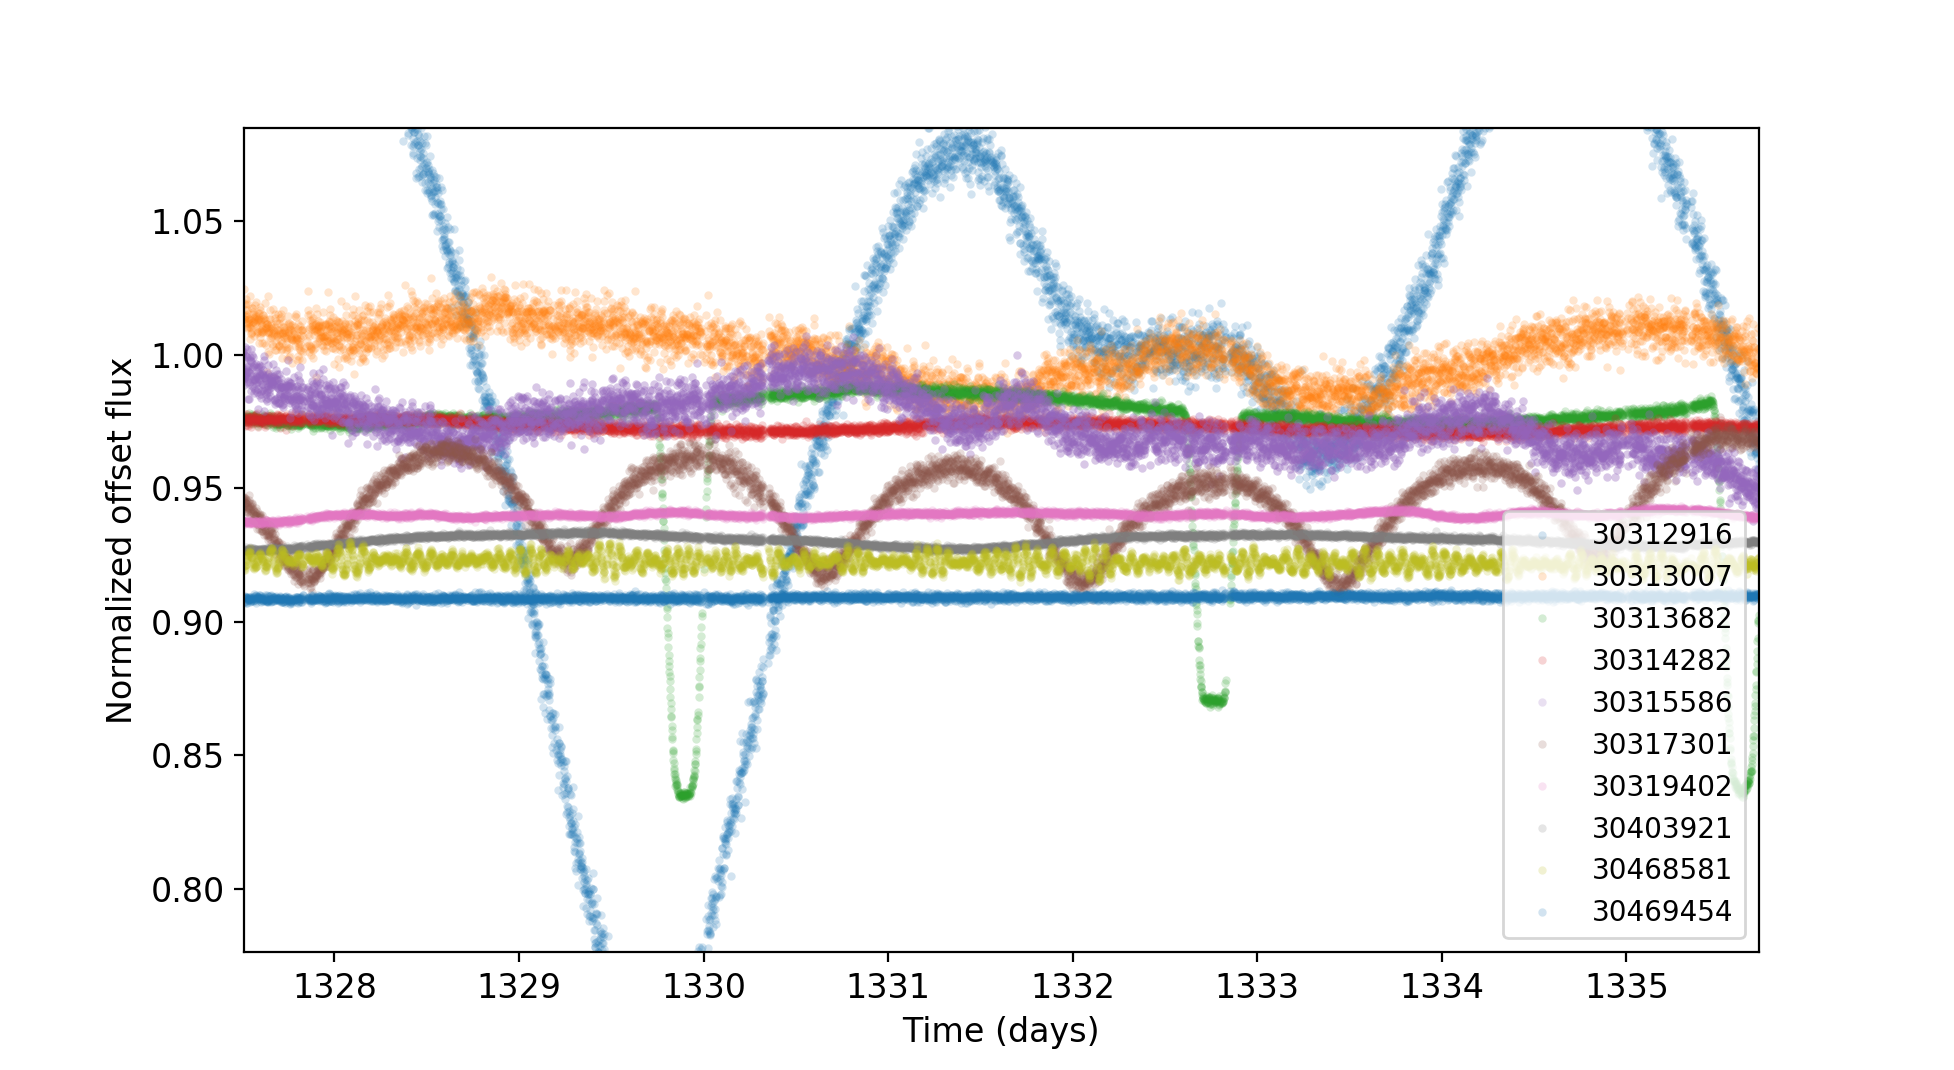

In [194]:
plotTessLightcurves(list(TicEclipsing)[40:50])

<IPython.core.display.Javascript object>


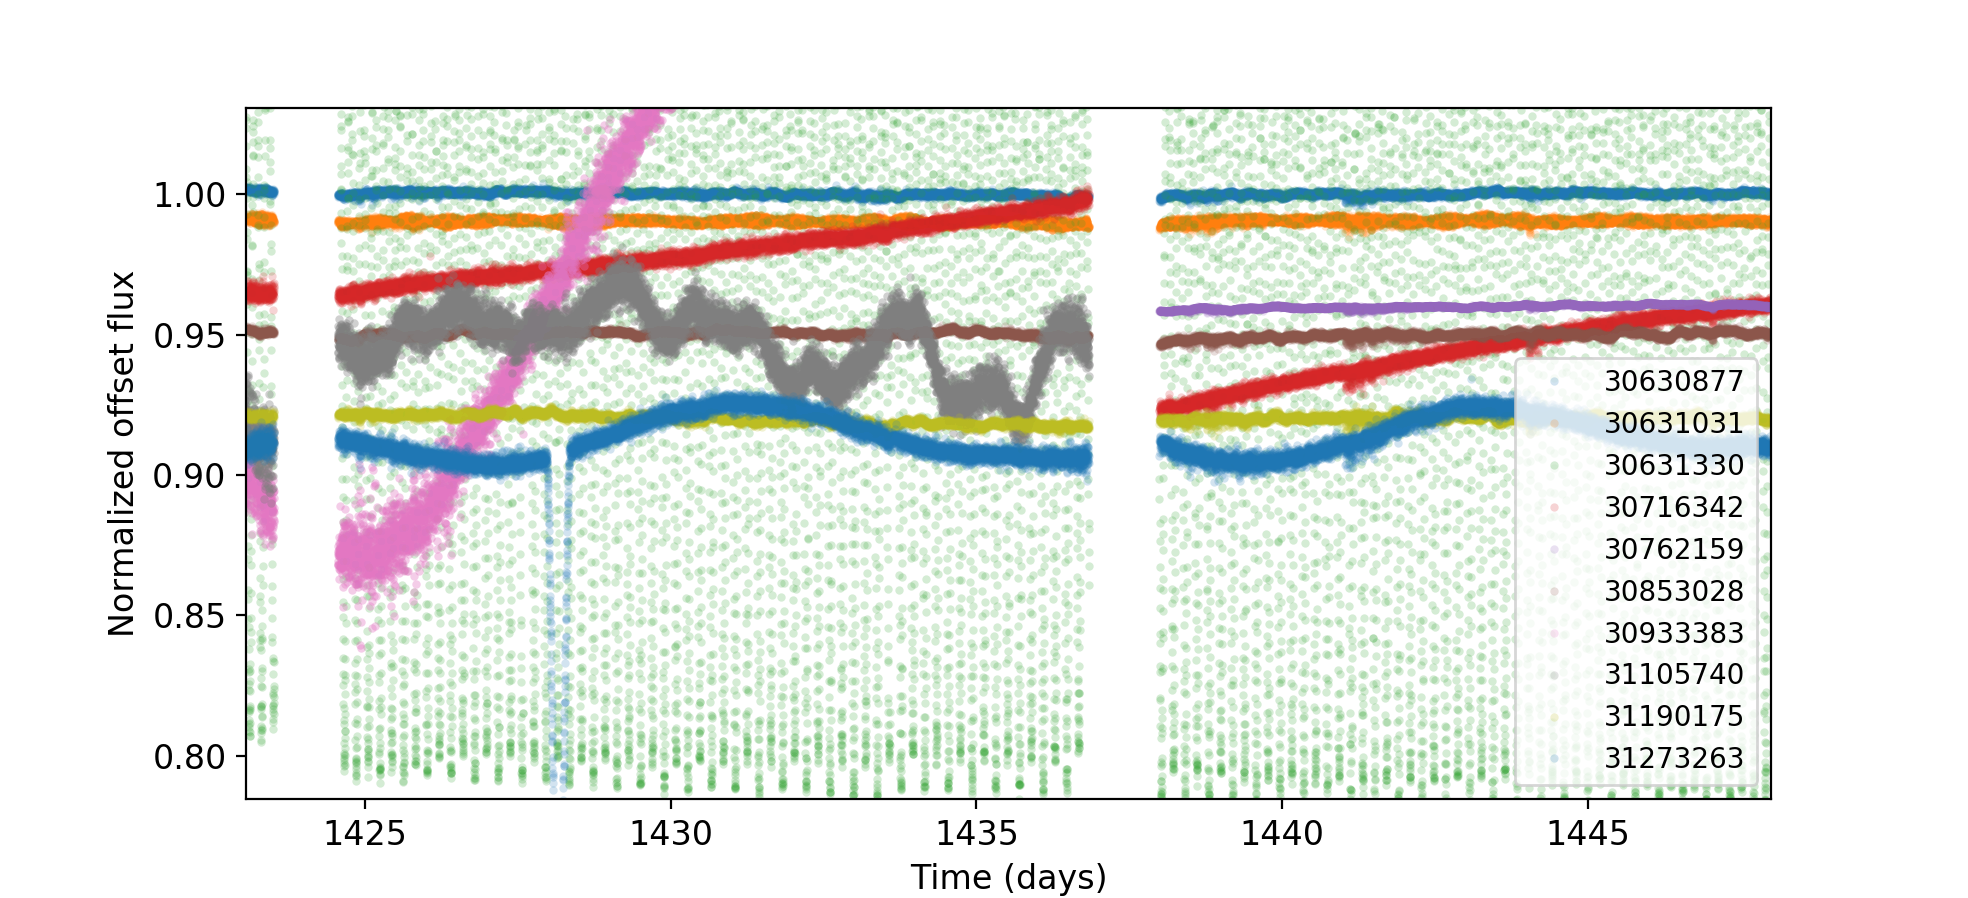

In [195]:
plotTessLightcurves(list(TicEclipsing)[50:60])

<IPython.core.display.Javascript object>


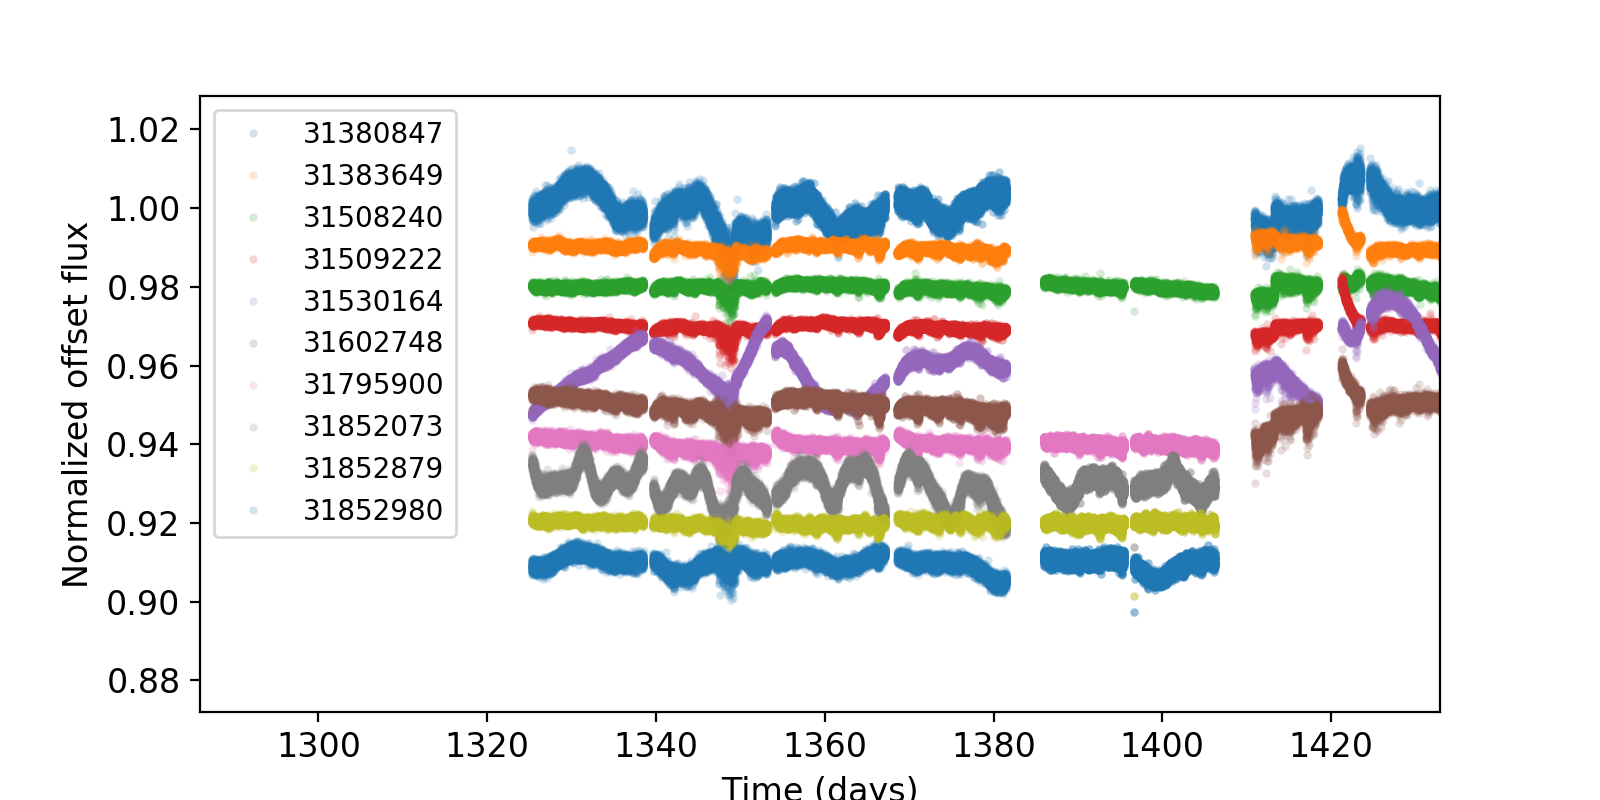

In [197]:
plotTessLightcurves(list(TicEclipsing)[60:70])

<IPython.core.display.Javascript object>


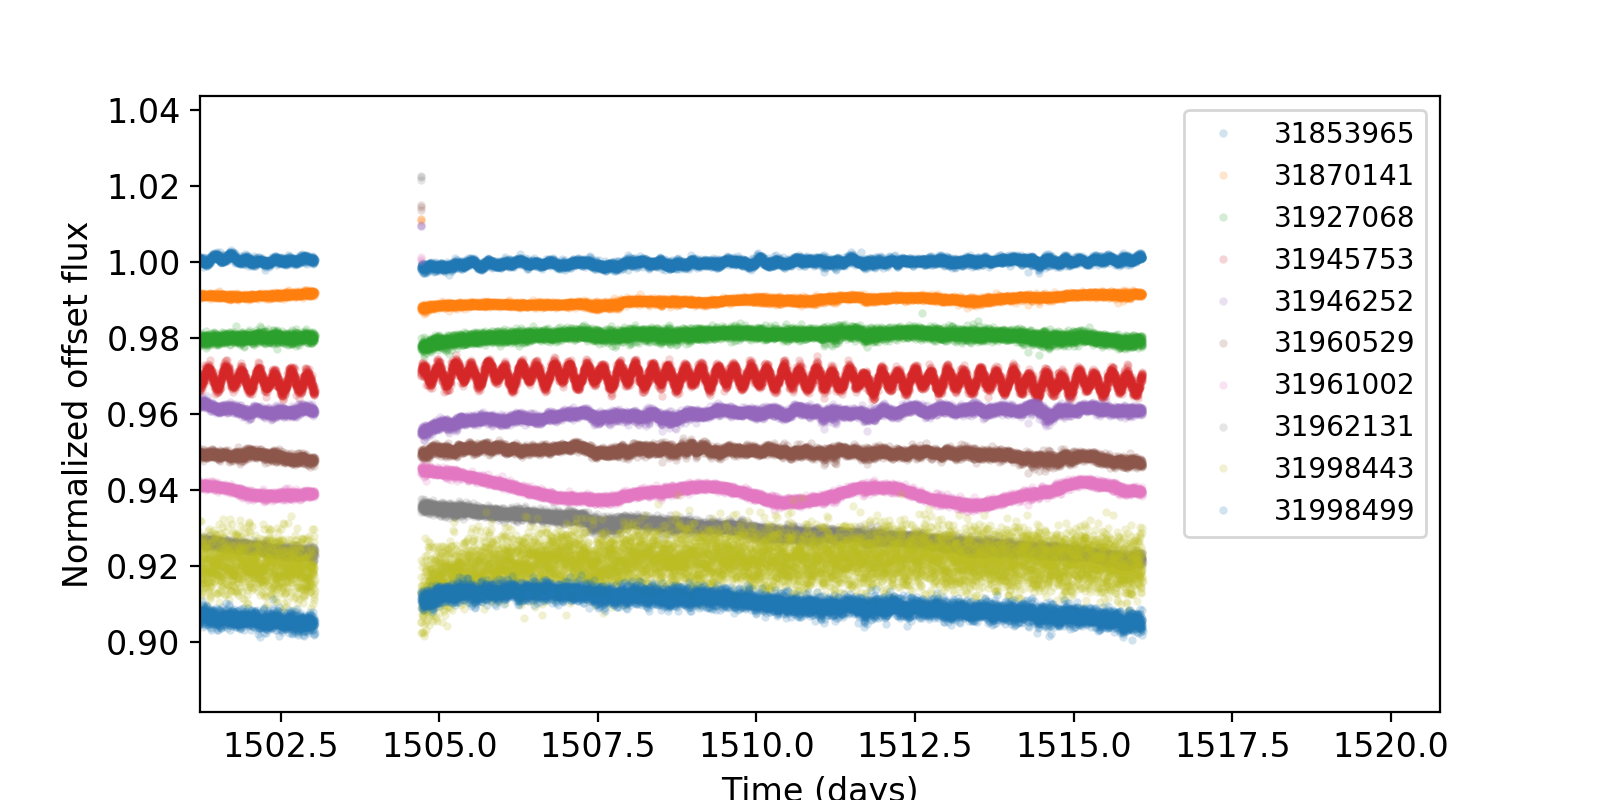

In [198]:
plotTessLightcurves(list(TicEclipsing)[70:80])

<IPython.core.display.Javascript object>


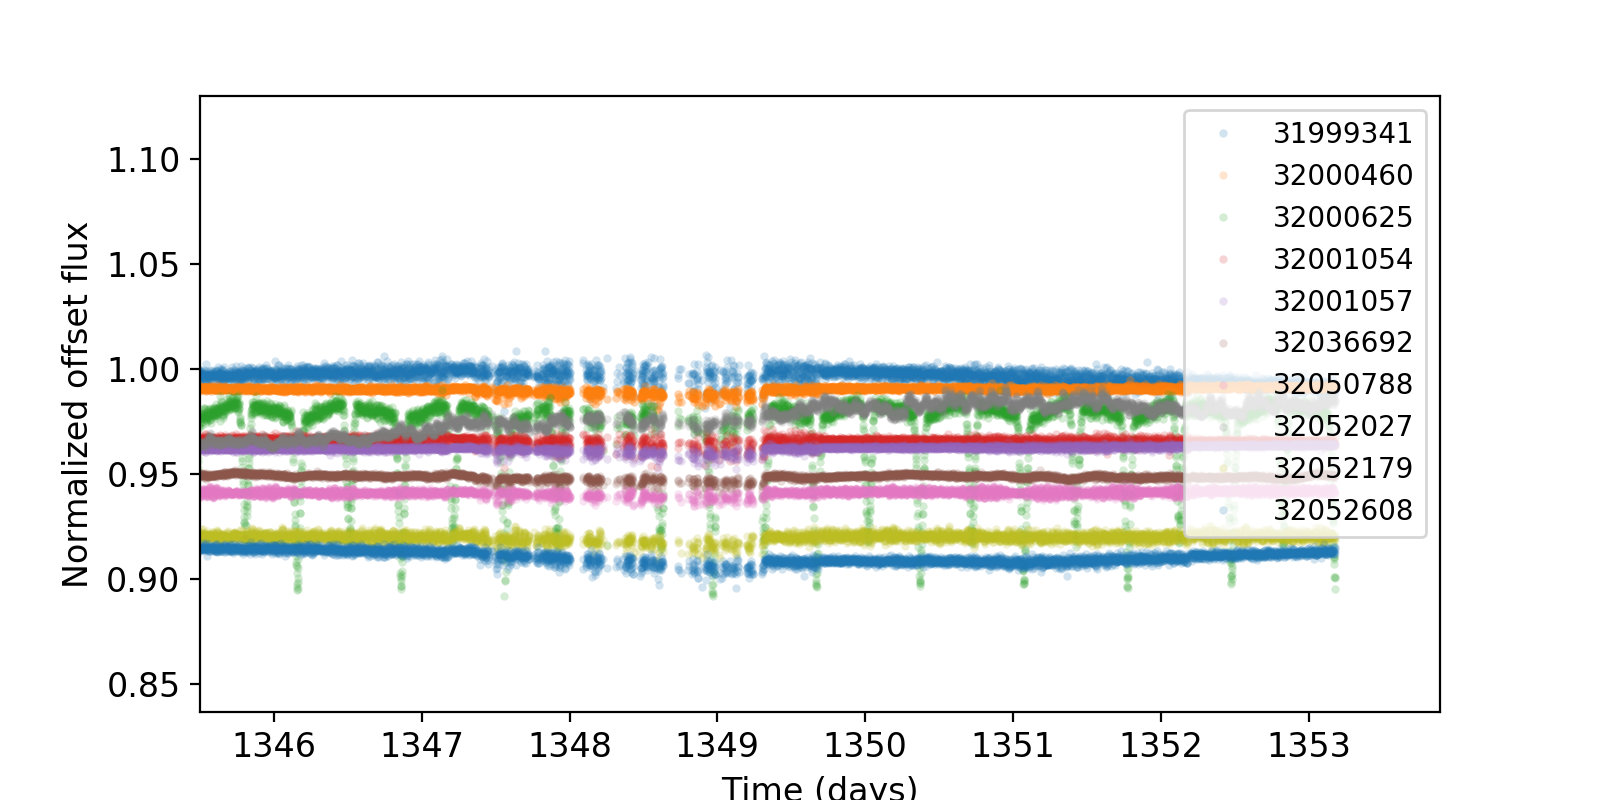

In [200]:
plotTessLightcurves(list(TicEclipsing)[80:90])

<IPython.core.display.Javascript object>


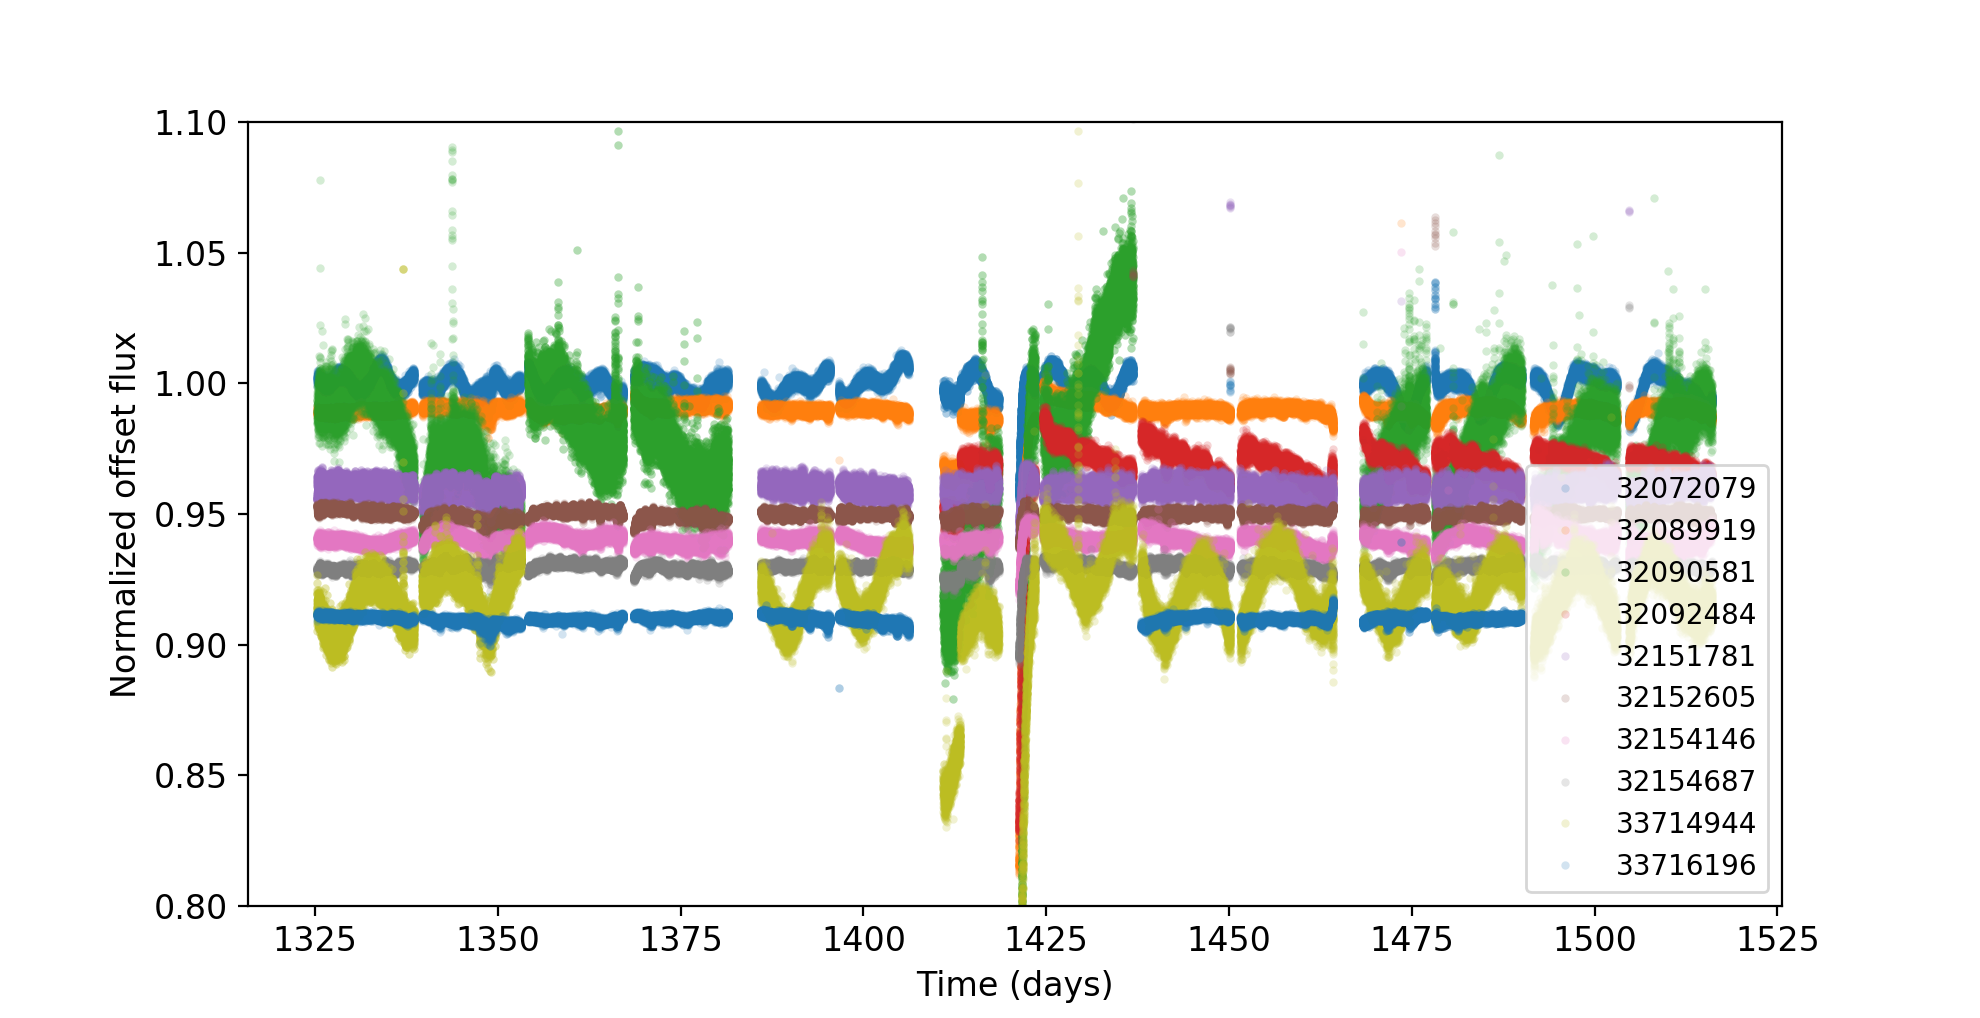

In [201]:
plotTessLightcurves(list(TicEclipsing)[90:100])